In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter("ignore")

In [38]:
dictionary = pd.read_excel("Data Dictionary - carprices.xlsx")
dictionary = dictionary.loc[3:28,['Unnamed: 7','Unnamed: 11']]
dictionary

,Unnamed: 7,Unnamed: 11
3,Car_ID,Unique id of each observation (Interger)
4,Symboling,"Its assigned insurance risk rating, A value of..."
5,carCompany,Name of car company (Categorical)
6,fueltype,Car fuel type i.e gas or diesel (Categorical)
7,aspiration,Aspiration used in a car (Categorical)
8,doornumber,Number of doors in a car (Categorical)
9,carbody,body of car (Categorical)
10,drivewheel,type of drive wheel (Categorical)
11,enginelocation,Location of car engine (Categorical)
12,wheelbase,Weelbase of car (Numeric)


In [17]:
df = pd.read_csv("CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [124]:
df_quant_cols = df[['symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price']]
df_cat_cols = df.drop(df_quant_cols.columns, axis=1)
df_cat_cols = df_cat_cols.drop(['car_ID','CarName'], axis=1)
print(df_quant_cols.columns, df_cat_cols.columns, sep="\n")

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')
Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object')


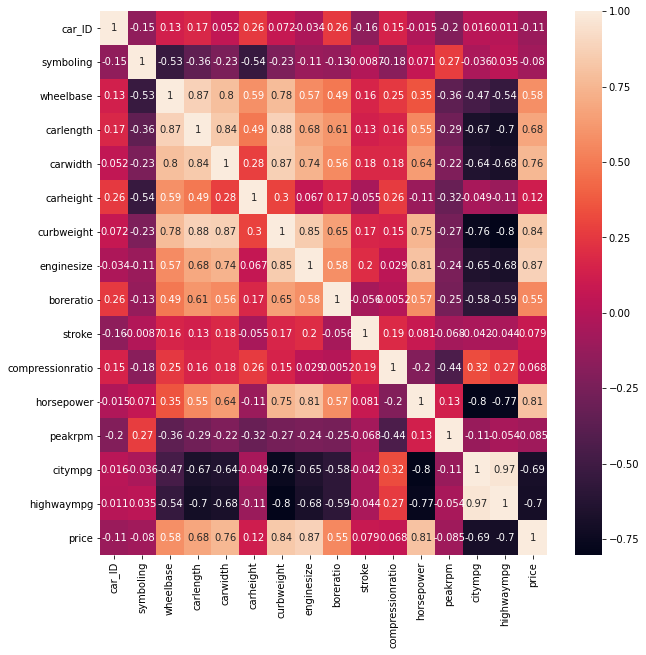

In [57]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True);

In [65]:
# Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
#        'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
#        'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
#        'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
#        'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
#        'price'],
#       dtype='object')

In [80]:
df['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

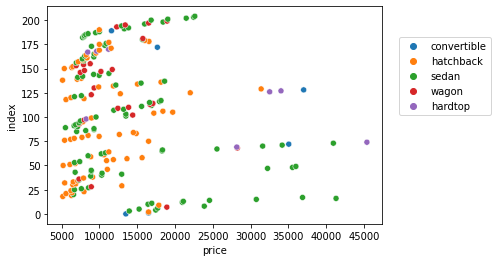

In [82]:
sns.scatterplot(data=df.reset_index(), x='price', y='index', hue= 'carbody')
plt.legend(loc=(1.05,0.5))

* above 25000 -> mostly sedan

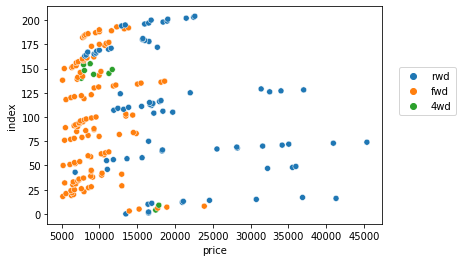

In [110]:
sns.scatterplot(data=df.reset_index(), x='price', y='index', hue= 'drivewheel')
plt.legend(loc=(1.05,0.5));

* fwd drivewheel is cheeper than rwd

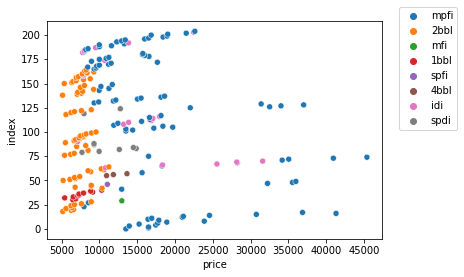

In [111]:
sns.scatterplot(data=df.reset_index(), x='price', y='index', hue= 'fuelsystem')
plt.legend(loc=(1.05,0.5));

In [96]:
def cy_num(x):
    if x=="two":
        x=2
    elif x=="three":
        x=3
    elif x=='four':
        x=4
    elif x=='five':
        x=5
    elif x=='six':
        x=6
    elif x=='eight':
        x=8
    else:
        x=12
    return x

In [99]:
df['cy_num'] = df['cylindernumber'].apply(cy_num)